# Perceptron class

$y=1, \mbox{if} \sum_i w_i x_1 >=b$

$y=0, \mbox{otherwise} $

In [0]:
import sklearn.datasets          # for datasets 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score    #for computing accuracy

In [0]:
breast_cancer = sklearn.datasets.load_breast_cancer()          #loading a paticular dataset from sklearn

In [0]:
x=breast_cancer.data         #it is the input (x)
y=breast_cancer.target       #it is the true output (y)

In [0]:
data=pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)          # converting the dataframe into pandas formate

In [0]:
data['class']=breast_cancer.target                              # creates the column for true_output (y)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x=data.drop('class',axis=1)       # droping the true output (y) from the data and taking the input (x)
y=data['class']                   # taking the true output(y)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, stratify=y,random_state=3) 

In [0]:
x_train=x_train.values
x_test=x_test.values

In [0]:
y_train=y_train.values
y_test=y_test.values

In [0]:
class Perceptron:
  def __init__(self):                                      #here we initialise model parameters                                      
    self.w=None
    self.b=None

  def model(self,x):
    return 1 if(np.dot(self.w,x) >= self.b) else 0         #model of the perceptron

  def predict(self,x):                                     #algorithm of perceptron
    y=[]
    for i in x:
      result=self.model(i)
      y.append(result)
    return np.array(y)

  def fit(self,x,y,epochs=1,lr=1):  #epoch and lr(learning rate) is a 'hyper parameters' where w and b are 'parameters' of the model {hyper parameters are indirectly used for learning where parameters are directly used for learning}
    self.w=np.ones(x.shape[1])                # initialising w with ones
    self.b=0                                  # initialising b with 0
    accuracy={}                          # to save accuracy values at each epochs
    max_accuracy=0                       # to find maximum accuracy after all epochs are done
    wt_matrix=[]                 # to save w values at each epochs       
    for k in range(epochs):  # we should run the model multiple times to get the maximum accuracy. (because w is updating each and every time)
      for i,j in zip(x,y):
        y_pred=self.model(i)             # finding model output y 
        if j==1 and y_pred==0:
          self.w=self.w+ lr * i          # to make the changes slow at each learning we use lr(learning rate) { to smooth the graph or decreasing the oscillation }
          self.b=self.b- lr * 1          # since w0x0=(-b) we use -ve sign instead of +ve 
        elif j==0 and y_pred==1:
          self.w=self.w- lr * i          # to make the changes slow at each learning we use lr(learning rate) { to smooth the graph or decreasing the oscillation }
          self.b=self.b+ lr * 1          # since w0x0=(-b) we use -ve sign instead of +ve
      wt_matrix.append(self.w)   # appending w to wt_matrix at each epochs

      accuracy[k] = accuracy_score(self.predict(x),y)  # saving all accuracy after each epochs to a dictionary
      #finding the maximum accuracy 
      if(accuracy[k]>max_accuracy): 
        max_accuracy=accuracy[k]
        checkptw=self.w    # when ever there is increase in accuracy we store w an b 
        checkptb=self.b
    self.w=checkptw  # value of w and b of highest tarining accuracy
    self.b=checkptb

    # prints maximum accuracy after all epochs are done
    print(max_accuracy)
    # ploting the accuracy at each epochs
    plt.plot(list(accuracy.values())) # as it is a dictionary we convert its values into list
    plt.ylim([0,1])
    plt.show()

    return np.array(wt_matrix) #returning for making animation to see how the weights are developed at each epochs

In [0]:
perceptron=Perceptron()      # creating object for the class Perceptron()

0.91796875


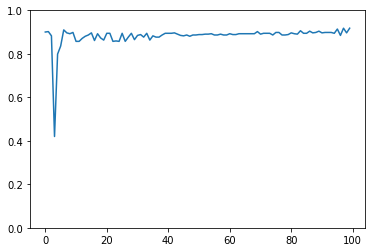

In [14]:
                                               # give lr value as less as possible(like 0.0001) give epoch value as more(like 10000)
wt_matrix=perceptron.fit(x_train,y_train,100)  # storing return values in wt_matrix and printing max accuracy and ploting accuracy at each levels of epochs

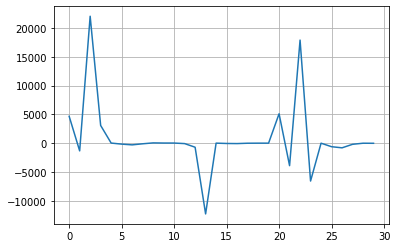

In [25]:
plt.plot(perceptron.w)  # we have initialised w with ones but it is modified with learning algorithm
plt.grid()               
plt.show()

In [15]:
type(wt_matrix)

numpy.ndarray

In [16]:
wt_matrix.shape    # for 100 epochs -> 100 rows, each contains weight for the all features of x(w1x1,w2x2,.....)

(100, 30)

In [17]:
y_pred_train=perceptron.predict(x_train)    # after checkptw and checkptb 
print(accuracy_score(y_pred_train, y_train))

0.91796875


## testing the model

In [18]:
y_pred_test=perceptron.predict(x_test)
print(accuracy_score(y_pred_test, y_test))

0.9649122807017544


# Animation of working of the model at each epochs
## to see how these weights are generated

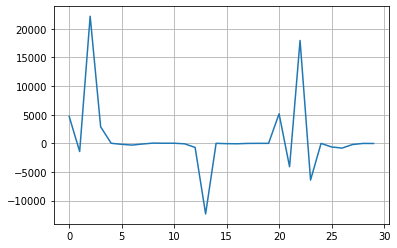

In [19]:
plt.plot(wt_matrix[-1,:])  # poloting the last row of the wt_matrix
plt.grid()
plt.show()

In [0]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML


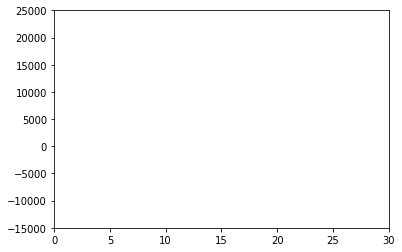

In [21]:
#First set up the figure, the axis and the plot element we want to animate
fig, ax= plt.subplots()

ax.set_xlim((0,wt_matrix.shape[1]))   # setting x limit from 0 to wt_matrix column shape
ax.set_ylim((-15000,25000))      # scaling y limit with comparing the last row of wt_matrix ploted above

line, =ax.plot([],[], lw=2)

In [0]:
# animation function. This is called sequentially
def animate(i):
  x=list(range(wt_matrix.shape[1]))  # x range from 1 to column shape
  y=wt_matrix[i,:]        # each row of wt matrix
  line.set_data(x,y)
  return(line,)

In [0]:
# call the animator. blit=True means only re_draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=100, interval=20, blit=True)  #can control the speed by adcusting the interval and frames values


In [24]:
HTML(anim.to_html5_video())  # we are converting into html video to work inline with jupyter notebook it is not needed when we run in python or shell 

# summary
1. can visualize how the algorithm is working
2. at each epochs the magnitude of weights are increasing
     as the model get comples the weights become large +ve or -ve which leads to over fitting. but here nothing happend like that.
